# Exploratory Data Analysis on House Pricing

# Feature Engineering 

<p> In feature engineering we will be addressing: </p>
<ol>
    <li>Missing Values</li>
    <li>Temporal Values</li>
    <li>Categorical values: remove rare labels</li>
    <li>Standardising variables</li>
</ol>

# Import the required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

# Reading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Split the data to avoid data leakage
X, y = df.iloc[:-1].values, df['SalePrice'].iloc[:-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1313, 81)
(146, 81)
(1313,)
(146,)


# Missing Values

Text(0.5, 1.0, 'Total Missing Values')

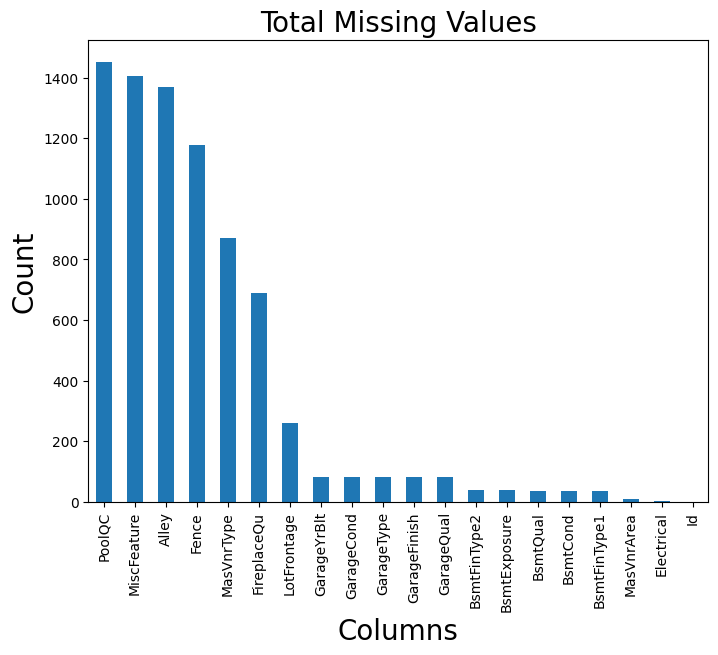

In [6]:
missing_data = df.isnull().sum().sort_values(ascending=False)
miss_data = missing_data.head(20)
miss_data.plot(kind='bar',figsize=(8,6),fontsize=10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

<p>Handling categorical values</p>

In [7]:
cat_features_nan = []
for feature in df.columns:
    if df[feature].isnull().sum() > 1 and df[feature].dtypes == 'object':
        cat_features_nan.append(feature)
print(cat_features_nan)

for feature in cat_features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))


['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Alley: 0.9377% missing values
MasVnrType: 0.5973% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [8]:
len(cat_features_nan)

15

# Finding the relationship between missing values and sales price

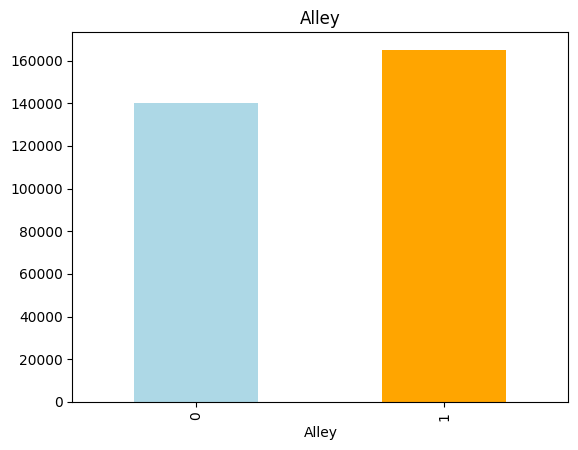

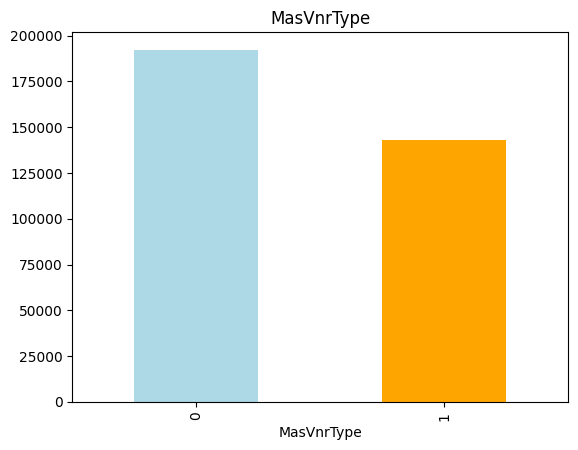

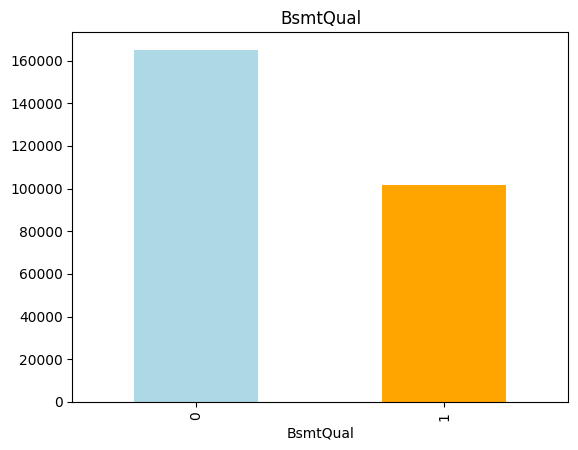

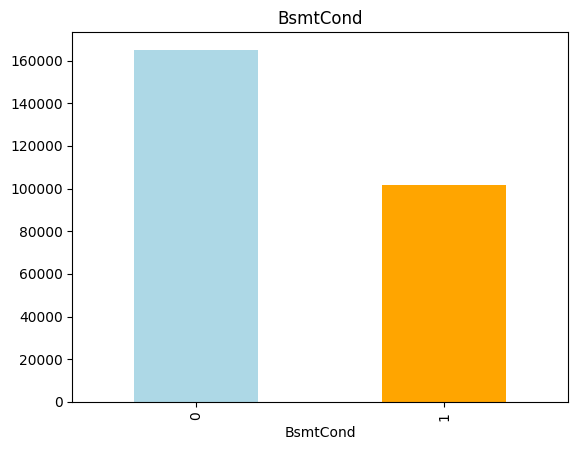

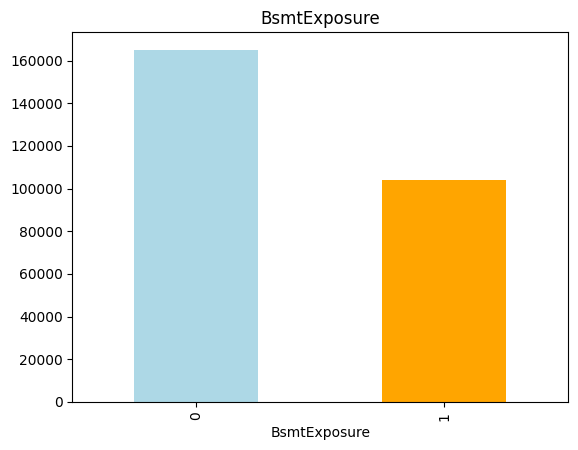

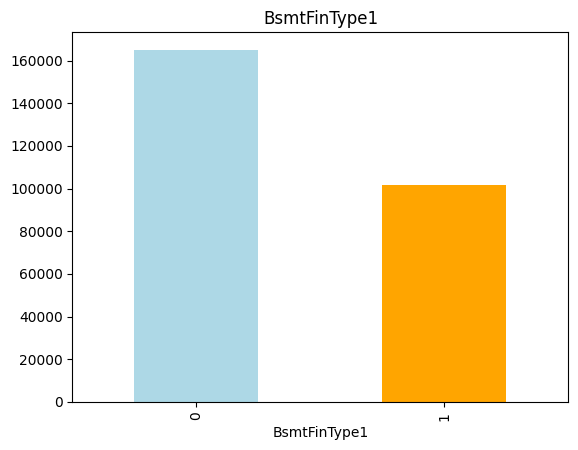

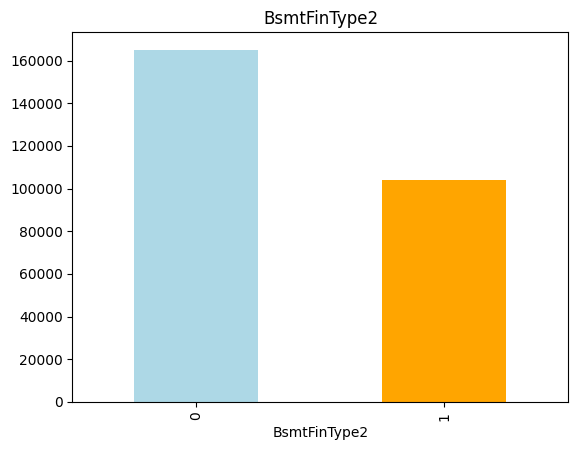

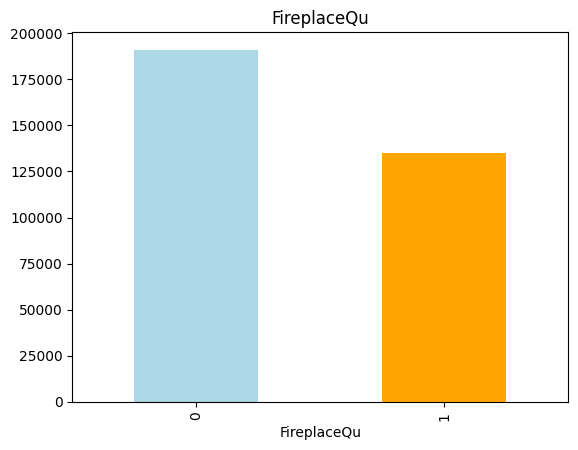

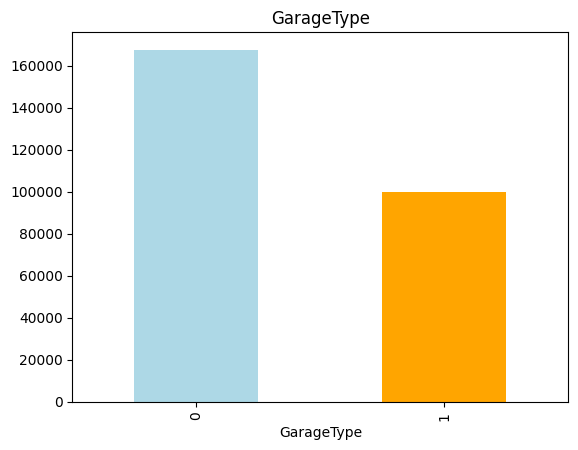

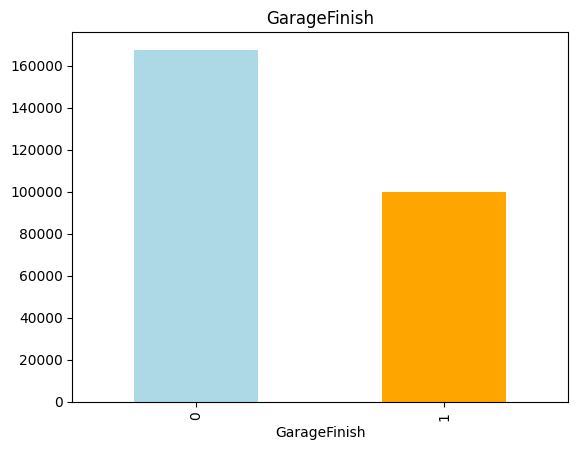

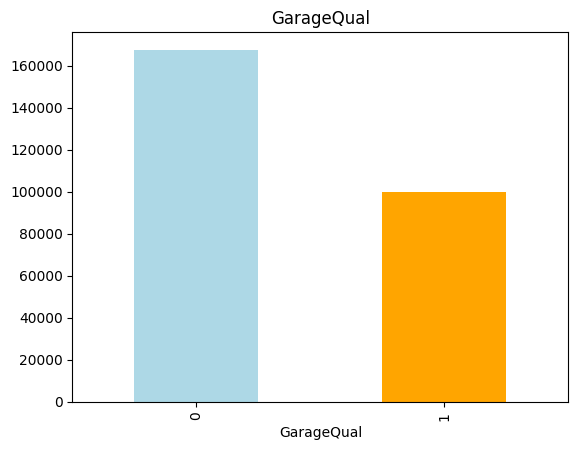

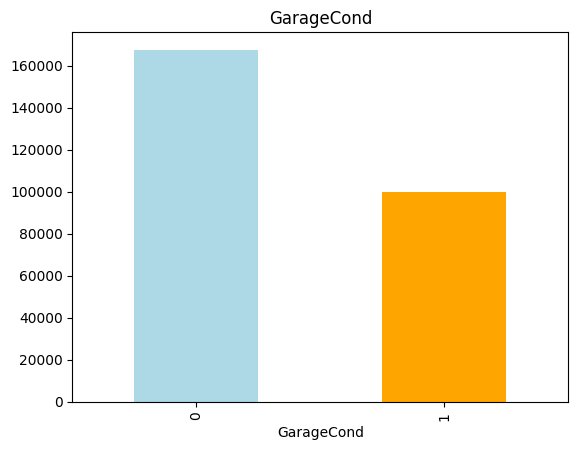

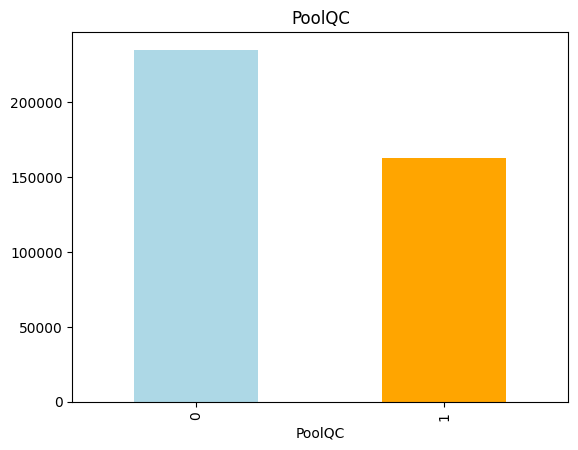

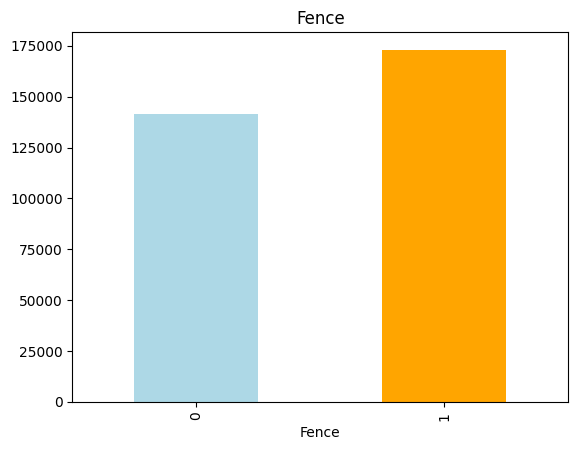

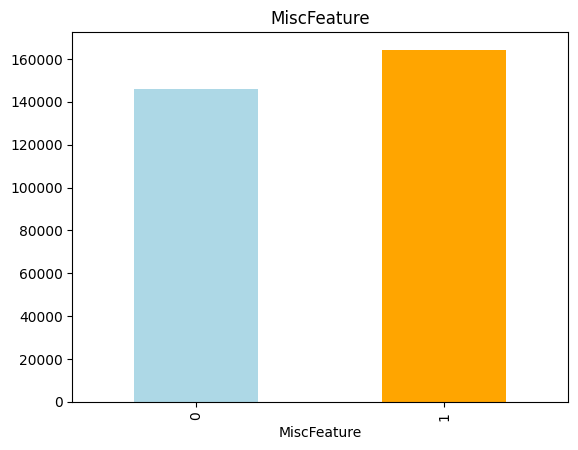

In [9]:
for feature in cat_features_nan:
    df = df.copy()
    df[feature] = np.where(df[feature].isnull(),1,0)
    grouped_data = df.groupby(feature)['SalePrice'].median()
    
    colors = ['lightblue' if val == 0 else 'orange' for val in grouped_data.index]
    
    grouped_data.plot(kind='bar', color=colors)
    
    plt.title(feature)
    plt.show()


#  Things to pay attention to 
#  -> Will sales price increase with the missing values ?
# -> Inversly proportional ?
# -> If there is a lot of missing values the price can be very low 


# Replace missing value with a new label

In [10]:
def replace_cat_feature(df,cat_features_nan):
    df = df.copy()
    df[cat_features_nan] = df[cat_features_nan].fillna('Missing')
    return df 

df = replace_cat_feature(df,cat_features_nan)
df[cat_features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,0,196.0,Gd,TA,PConc,0,0,0,0,706,0,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,1,0,2003.0,0,2,548,0,0,Y,0,61,0,0,0,0,1,1,1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,1,0.0,TA,TA,CBlock,0,0,0,0,978,0,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,0,0,1976.0,0,2,460,0,0,Y,298,0,0,0,0,0,1,1,1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,0,162.0,Gd,TA,PConc,0,0,0,0,486,0,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,0,0,2001.0,0,2,608,0,0,Y,0,42,0,0,0,0,1,1,1,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,1,0.0,TA,TA,BrkTil,0,0,0,0,216,0,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,0,0,1998.0,0,3,642,0,0,Y,0,35,272,0,0,0,1,1,1,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,0,350.0,Gd,TA,PConc,0,0,0,0,655,0,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,0,0,2000.0,0,3,836,0,0,Y,192,84,0,0,0,0,1,1,1,0,12,2008,WD,Normal,250000


# Exploring the missing numerical features 

In [12]:
num_features_nan = []
# cat_features_nan = []
for feature in df.columns:
    if df[feature].isnull().sum() > 1 and df[feature].dtypes != 'object':
        num_features_nan.append(feature)
print(num_features_nan)

for feature in num_features_nan:
    print("{}: {}% missing values".format(feature,np.around(df[feature].isnull().mean(),4)))

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
LotFrontage: 0.1774% missing values
MasVnrArea: 0.0055% missing values
GarageYrBlt: 0.0555% missing values


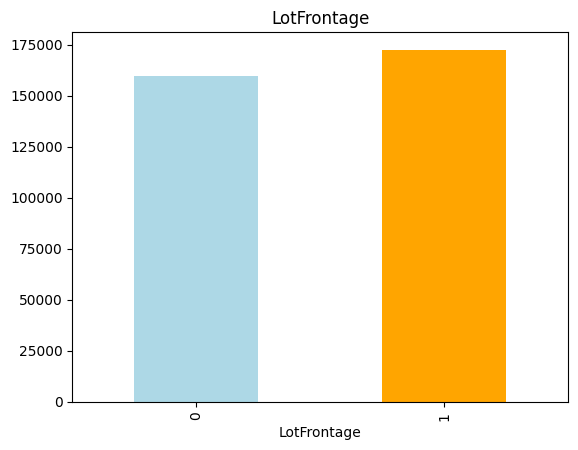

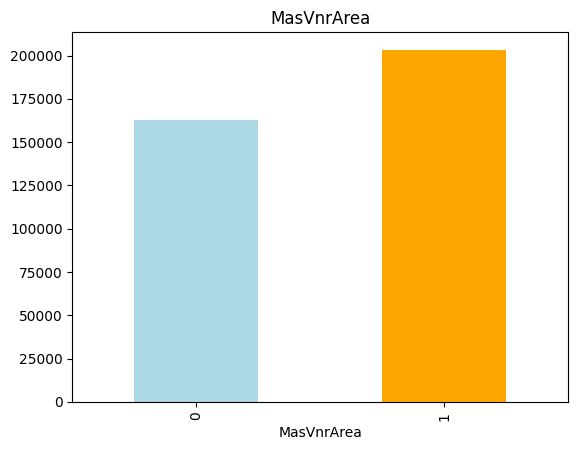

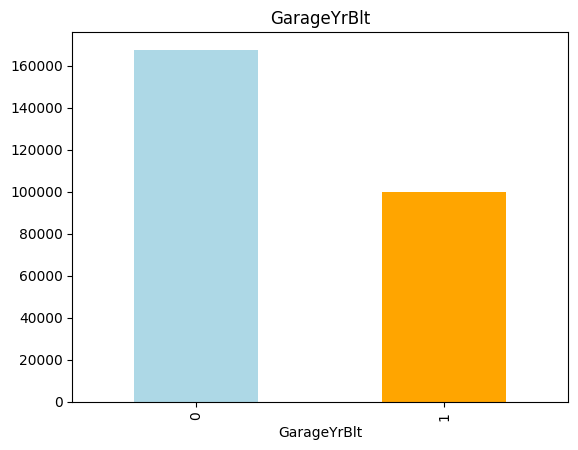

In [13]:
for feature in num_features_nan:
    df_cpy= df.copy()
    df_cpy[feature] = np.where(df_cpy[feature].isnull(),1,0)
    grouped_data = df_cpy.groupby(feature)['SalePrice'].median()
    
    colors = ['lightblue' if val == 0 else 'orange' for val in grouped_data.index]
    
    grouped_data.plot(kind='bar', color=colors)
    
    plt.title(feature)
    plt.show()

# Replacing the missing values with median

In [14]:
for feature in num_features_nan:
    median = df[feature].median()
    df[feature + 'nan'] = np.where(df[feature].isnull(),1,0)
    df[feature] = df[feature].fillna(median)

df[num_features_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [15]:
df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,0,196.0,Gd,TA,PConc,0,0,0,0,706,0,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,1,0,2003.0,0,2,548,0,0,Y,0,61,0,0,0,0,1,1,1,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,1,0.0,TA,TA,CBlock,0,0,0,0,978,0,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,0,0,1976.0,0,2,460,0,0,Y,298,0,0,0,0,0,1,1,1,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,0,162.0,Gd,TA,PConc,0,0,0,0,486,0,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,0,0,2001.0,0,2,608,0,0,Y,0,42,0,0,0,0,1,1,1,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,1,0.0,TA,TA,BrkTil,0,0,0,0,216,0,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,0,0,1998.0,0,3,642,0,0,Y,0,35,272,0,0,0,1,1,1,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,0,350.0,Gd,TA,PConc,0,0,0,0,655,0,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,0,0,2000.0,0,3,836,0,0,Y,192,84,0,0,0,0,1,1,1,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,1,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,1,0.0,TA,TA,Wood,0,0,0,0,732,0,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,1,0,1993.0,0,2,480,0,0,Y,40,30,0,320,0,0,1,0,0,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,1,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,0,186.0,Gd,TA,PConc,0,0,0,0,1369,0,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,0,0,2004.0,0,2,636,0,0,Y,255,57,0,0,0,0,1,1,1,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,1,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,0,240.0,TA,TA,CBlock,0,0,0,0,859,0,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,0,0,1973.0,0,2,484,0,0,Y,235,204,228,0,0,0,1,1,0,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,1,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,1,0.0,TA,TA,BrkTil,0,0,0,0,0,0,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,0,0,1931.0,0,2,468,0,0,Y,90,0,205,0,0,0,1,1,1,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,1,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,1,0.0,TA,TA,BrkTil,0,0,0,0,851,0,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,0,0,1939.0,0,1,205,0,0,Y,0,4,0,0,0,0,1,1,1,0,1,2008,WD,Normal,118000,0,0,0


# Addressing Date-Time variables

In [16]:
# df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[feature] = df['YrSold'] - df[feature]

In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,0,196.0,Gd,TA,PConc,0,0,0,0,706,0,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,1,0,5.0,0,2,548,0,0,Y,0,61,0,0,0,0,1,1,1,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,1,0.0,TA,TA,CBlock,0,0,0,0,978,0,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,0,0,31.0,0,2,460,0,0,Y,298,0,0,0,0,0,1,1,1,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,0,162.0,Gd,TA,PConc,0,0,0,0,486,0,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,0,0,7.0,0,2,608,0,0,Y,0,42,0,0,0,0,1,1,1,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,1,0.0,TA,TA,BrkTil,0,0,0,0,216,0,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,0,0,8.0,0,3,642,0,0,Y,0,35,272,0,0,0,1,1,1,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,0,350.0,Gd,TA,PConc,0,0,0,0,655,0,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,0,0,8.0,0,3,836,0,0,Y,192,84,0,0,0,0,1,1,1,0,12,2008,WD,Normal,250000,0,0,0


In [18]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()


,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


# Checking the skewness of the features 

In [29]:
num_features = []
for feature in df.columns:
    if df[feature].dtypes != 'object':
        num_features.append(feature)

for feature in num_features:
    print(f"skewness of {feature}:{df[feature].skew()}")

skewness of Id:0.0
skewness of MSSubClass:1.4076567471495591
skewness of LotFrontage:2.4091466665496006
skewness of LotArea:12.207687851233496
skewness of Alley:-3.624557413694621
skewness of OverallQual:0.2169439277628693
skewness of OverallCond:0.6930674724842182
skewness of YearBuilt:0.609030229450241
skewness of YearRemodAdd:0.5024890321999378
skewness of MasVnrType:-0.3970251188243635
skewness of MasVnrArea:2.6776164510820997
skewness of BsmtQual:6.046533565324787
skewness of BsmtCond:6.046533565324787
skewness of BsmtExposure:5.959928415463224
skewness of BsmtFinType1:6.046533565324787
skewness of BsmtFinSF1:1.685503071910789
skewness of BsmtFinType2:5.959928415463224
skewness of BsmtFinSF2:4.255261108933303
skewness of BsmtUnfSF:0.9202684528039037
skewness of TotalBsmtSF:1.5242545490627664
skewness of 1stFlrSF:1.3767566220336365
skewness of 2ndFlrSF:0.8130298163023265
skewness of LowQualFinSF:9.011341288465387
skewness of GrLivArea:1.3665603560164552
skewness of BsmtFullBath:0.5

In [31]:
top_skewed_features = df[num_features].apply(lambda x : x.skew()).sort_values(ascending=False)
top_skewed_features

MiscVal           24.476794
PoolArea          14.828374
MasVnrAreanan     13.411750
LotArea           12.207688
3SsnPorch         10.304342
LowQualFinSF       9.011341
BsmtQual           6.046534
BsmtCond           6.046534
BsmtFinType1       6.046534
BsmtExposure       5.959928
BsmtFinType2       5.959928
KitchenAbvGr       4.488397
BsmtFinSF2         4.255261
ScreenPorch        4.122214
BsmtHalfBath       4.103403
GarageCond         3.887735
GarageQual         3.887735
GarageFinish       3.887735
GarageType         3.887735
GarageYrBltnan     3.887735
EnclosedPorch      3.089872
MasVnrArea         2.677616
LotFrontage        2.409147
OpenPorchSF        2.364342
SalePrice          1.882876
LotFrontagenan     1.690737
BsmtFinSF1         1.685503
WoodDeckSF         1.541376
TotalBsmtSF        1.524255
MSSubClass         1.407657
1stFlrSF           1.376757
GrLivArea          1.366560
BsmtUnfSF          0.920268
2ndFlrSF           0.813030
OverallCond        0.693067
TotRmsAbvGrd       0

# Apply log transform to the features 

Skewness of LotFrontage after log transform:-1.8376844179474012
Skewness of LotArea after log transform:-0.8701832413737057
Skewness of 1stFlrSF after log transform:-0.14297110514103892
Skewness of GrLivArea after log transform:-0.24770112726277965
Skewness of SalePrice after log transform:-0.07898781778508616


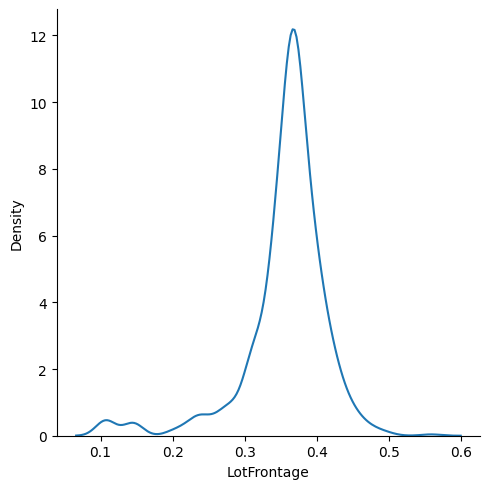

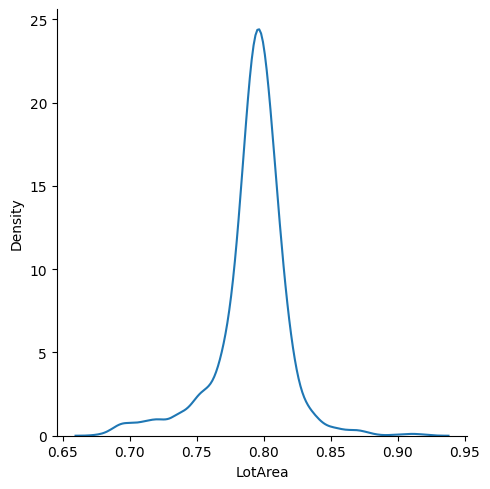

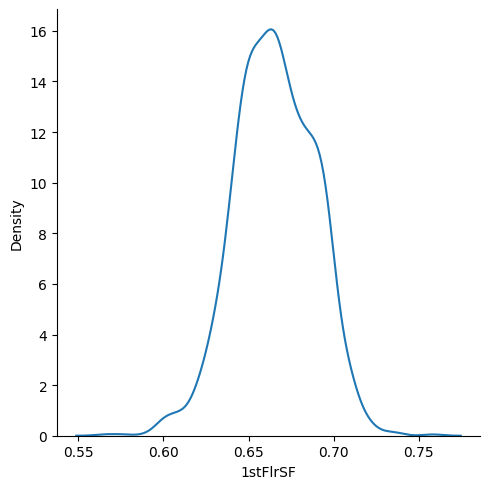

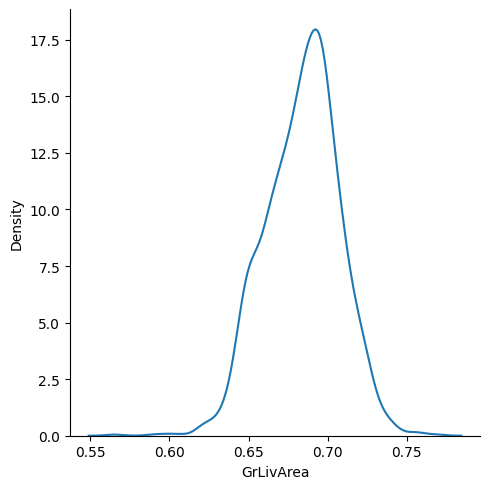

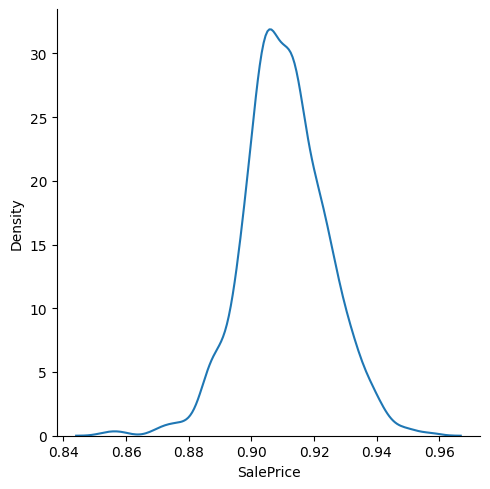

In [34]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df[feature]=np.log(df[feature])
    sns.displot(df[feature],kind='kde')
    print(f"Skewness of {feature} after log transform:{df[feature].skew()}")